In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
len(data)

541909

**Data Description**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data Cleaning** 

Data cleaning is the process of **detecting and correcting (or removing) corrupt or inaccurate records** from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data (Wikipedia).

### 1. Handling Missing Values

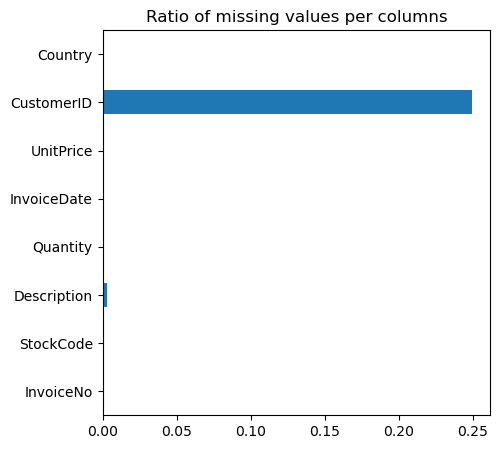

Detail Numbers of Missing Values per columns:


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
#checking Missing Values

plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()
print('Detail Numbers of Missing Values per columns:')
data.isna().sum().sort_values(ascending=False)

In [8]:
#Display data with any missing values
data[data.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In handling missing values, there are different ways to take depends on the reason behind the missing values itself. According to Rubin (1976) and colleagues (Little & Rubin, 2002), There are 3 types of Missing Values based on the reason behind it; 
- Missing Completely At Random (MCAR), 
- Missing At Random (MAR), and 
- Missing Not At Random (MNAR). 

Each types of missing values has different approach on handling it. In this case, the missing values on this datasets is a case of Missing Completely At Random. To support that, i quoted the explanation about MCAR by Enders (2010) that said "data are MCAR when the probability of missing data on a variable X is unrelated to other measured variables and to the values of X itself". As we can see in the dataset, CustomerID is just a 5-digit integral number uniquely assigned to each customer which has nothing to do with other variables. Missing Values in Description feature is MCAR as well with the same explanation. 

Since all the Missing Values in this dataset is a MCAR types, so we have to handle it with MCAR approach. There are several way to handle MCAR types of Missing Values. In this case i am using Deletion Methods, particularly listwise deletion. In listwise deletion (also called complete-case analysis or casewise deletion), cases with missing values are discarded, so the analyses are restricted to cases that have complete data only.

In [9]:
data = data.dropna(subset=['CustomerID'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


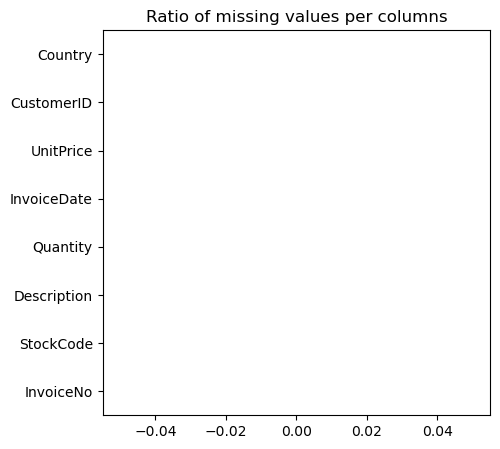

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Checking Missing Values after handling
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()
data.isnull().sum().sort_values(ascending=False)

In [12]:
data.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


### 2. Convert InvoiceDate type into datetime

In [13]:
print("InvoiceDate Feature Type before converted: ", data['InvoiceDate'].dtype)
print("*"*100)

#Change the "InvoiceDate" Format into date time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print("InvoiceDate Feature Type after converted : ", data['InvoiceDate'].dtype)
data.head()

InvoiceDate Feature Type before converted:  object
****************************************************************************************************
InvoiceDate Feature Type after converted :  datetime64[ns]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### 3. Adding Neccesary Features

In this project, i am going to do RFM analysis to segment the customers of Online Retail in UK. In order to do RFM analysis we obviously need a feature which shows the value of Recency, Frequency, and Monetary. Hence i am going to create new dataframes which calculates the value of RFM itself later on in this project. In addition to this project, I am going to do some Exploratory Data Analysis (EDA) as well. Therefore, I am going to need several features like Months, Days, and hours. In conclusion, to complete this project i am going to add these features on my datasets :
1. Date
2. Years
3. Months
4. Days
5. Hours
6. DayOfMonth


In spite of that, it is possible that i'm going to add another features in the process of EDA.

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### 3.1 Adding timeframe features

In [16]:
# Adding Years, Months, Days, Hours, and Date
data['Years'] = data['InvoiceDate'].dt.year
data['Months'] = data['InvoiceDate'].dt.month
data['Days'] = data['InvoiceDate'].dt.dayofweek+1
data['Hours'] = data['InvoiceDate'].dt.hour
data['Date'] = data['InvoiceDate'].dt.date
data['DayOfMonth'] = data['InvoiceDate'].dt.day

#rearrange dataset
data = data[['InvoiceNo',  'InvoiceDate', 'Date', 'Years', 'Months',
             'Days','Hours','DayOfMonth','StockCode', 'Description', 
             'Quantity', 'UnitPrice', 'CustomerID', 'Country']]

data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


**3.2 Adding Total Cost Feature**

In [17]:
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


In [18]:
#Calculate Monetary Value and Insert it into the Datasets at a time
data.insert(loc = 14, column = 'TotalCost', value = data['Quantity']*data['UnitPrice'])
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


In [19]:
data.to_csv("E-commerce_data_clean.csv", index=False)
cek_data = pd.read_csv("E-commerce_data_clean.csv")
cek_data.head(3)

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
